# Solving `FrozenLake-v1`: the Markov Decision Process Approach

Here, we treat this problem as an discounted reward, infinite horizon MDP with discount factor 1. (Since the non-zero reward can only be obtained once in each episold, the total reward will always be finite.) 

Documentation: [Frozen Lake](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)

<br>
<iframe width="800" height="600" src="https://www.gymlibrary.dev/environments/toy_text/frozen_lake/"></iframe>

## Value Iteration

Note that the value iteration algorithm below is not updating the values of termination states. Thus the values of those states must be initialized correctly at zero. 

In [1]:
import gym
import numpy as np

# Load the FrozenLake-v1 environment
env = gym.make('FrozenLake-v1', 
               desc=None, 
               map_name="4x4", 
               is_slippery=True)


# --------------------  -------------------- # 

# Set the discount factor (gamma) 
gamma = 1.0

# Set the maximum number of iterations for the value iteration loop
max_iterations = 200

# Initialize the value function with all zeros
V = np.zeros(env.observation_space.n)

# Track the convergence
V_total = []


# --------------------  -------------------- # 

# Start the value iteration loop
for i in range(max_iterations):
    # Initialize the updated value function with all zeros
    V_updated = np.zeros(env.observation_space.n)
    
    # Iterate over all states
    for s in range(env.observation_space.n):
        # Initialize the vector of values associate with all actions
        values = []

        # Iterate over all actions
        for a in range(env.action_space.n):
            # Initialize the value for the state-action pair 
            value = 0
            
            # Iterate over all next states
            for p, s_prime, r, _ in env.P[s][a]:
                # Update the value for the state-action pair
                value += p * (r + gamma * V[s_prime])
            
            # Append value for the state-action pair
            values.append(value)
        
        # Update the value function for the state
        V_updated[s] = max(values)
    
    # Set the updated value function as the current value function
    V = V_updated
    V_total.append(np.sum(V))

Convergence rate: 

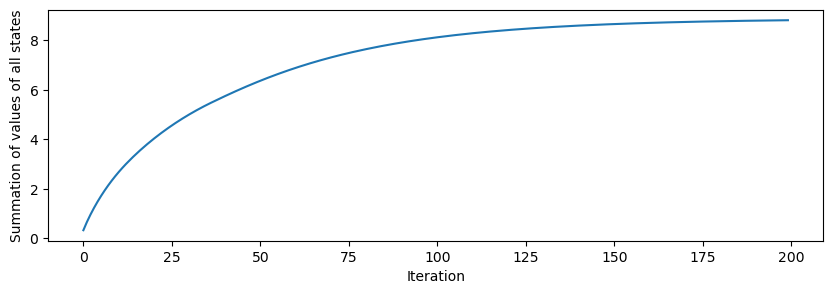

In [2]:
import matplotlib.pyplot as plt

# Plot the rewards over time
plt.figure(figsize=(10, 3), dpi=100)
plt.plot(V_total)
plt.xlabel("Iteration")
plt.ylabel("Summation of values of all states")
plt.show()

The value of each state reflects the probability of eventually getting the gift (instead of ending up in holes), since: 

* $\gamma = 1$

* The reward of getting the gift is 1, and can only be obtained once

* The reward of getting the gift is the only non-zero reward

In [3]:
# Print the final value function
print('The Value of all States: ')
print(np.reshape(np.array(V), (4, 4)))

The Value of all States: 
[[0.8167335  0.81445553 0.81283803 0.81199873]
 [0.81722818 0.         0.5245526  0.        ]
 [0.81818151 0.81952412 0.76117345 0.        ]
 [0.         0.87950893 0.93970076 0.        ]]


The Q function: 

In [4]:
# Initialize the Q functions with all zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Iterate over all states
for s in range(env.observation_space.n):
    # Iterate over all actions
    for a in range(env.action_space.n):
        # Iterate over all next states
        for p, s_prime, r, _ in env.P[s][a]:
            # Update the value for the state-action pair
            Q[s,a] += p * (r + gamma * V[s_prime])

print(Q)

[[0.8168984  0.81613907 0.81613907 0.81597418]
 [0.54372968 0.54319051 0.54243118 0.81467569]
 [0.71728205 0.71700229 0.71646312 0.81309743]
 [0.54161225 0.54161225 0.54133249 0.8122785 ]
 [0.81738106 0.54513656 0.54497167 0.54465389]
 [0.         0.         0.         0.        ]
 [0.52467049 0.25372448 0.52467049 0.27094601]
 [0.         0.         0.         0.        ]
 [0.54513656 0.54590188 0.5455841  0.81831127]
 [0.56589681 0.8196213  0.54689413 0.52645165]
 [0.76125916 0.58640829 0.48808445 0.44802557]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.56634435 0.60640323 0.87957793 0.58640829]
 [0.86012771 0.93973656 0.9002914  0.88022746]
 [0.         0.         0.         0.        ]]


The optimal policy: 

In [5]:
actions = np.array(['<', 'V', '>', 'A']) # left, down, right, up
optimal_policy = actions[np.argmax(Q, axis=1)]

print(optimal_policy.reshape((4, 4)))

[['<' 'A' 'A' 'A']
 ['<' '<' '<' '<']
 ['A' 'V' '<' '<']
 ['<' '>' 'V' '<']]


## Modified Policy Iteration

In [6]:
import gym
import numpy as np

# Load the FrozenLake-v1 environment
env = gym.make('FrozenLake-v1', 
               desc=None, 
               map_name="4x4", 
               is_slippery=True)


# --------------------  -------------------- # 

# Set the discount factor (gamma) 
gamma = 1.0

# Set the maximum number of iterations for the value iteration loop
policy_iterations = 20
value_iterations = 10

# Initialize the policy
# policy = np.random.randint(env.action_space.n, size=env.observation_space.n)
policy = np.zeros(env.observation_space.n).astype(int)

# Track the convergence
V_total = []

# Initialize the updated value function to all zeros
V = np.zeros(env.observation_space.n)


# --------------------  -------------------- # 

# Start the policy iteration loop
for i in range(policy_iterations): 

    # ----- POLICY EVALUATION ----- # 

    # Reset values of termination states
    V[np.array((5,7,11,12,15))] = 0 

    # Start the value iteration loop
    for j in range(value_iterations): 
        # Iterate over all states
        for s in range(env.observation_space.n):
            # Find the corresponding action
            a = policy[s]
            # Initialize value of the state
            value = 0

            # Iterate over all next states
            for p, s_prime, r, _ in env.P[s][a]:
                # Update the value for the state-action pair
                value += p * (r + gamma * V[s_prime])
            
            # get value of the state
            V[s] = value

        # Track the convergence
        V_total.append(np.sum(V))

    # ----- POLICY IMPROVEMENT ----- # 
    
    # Iterate over all states
    for s in range(env.observation_space.n):
        # Initialize the vector of values associate with all actions
        values = []

        # Iterate over all actions
        for a in range(env.action_space.n):
            # Initialize the value for the state-action pair 
            value = 0
            
            # Iterate over all next states
            for p, s_prime, r, _ in env.P[s][a]:
                # Update the value for the state-action pair
                value += p * (r + gamma * V[s_prime])
            
            # Append value for the state-action pair
            values.append(value)
            policy[s] = np.argmax(values)
    
    print(policy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 1 2 3 0 0 0 0 0 1 0 0 0 1 2 0]
[1 2 2 3 0 0 0 0 1 1 0 0 0 2 2 0]
[0 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


Convergence rate: 

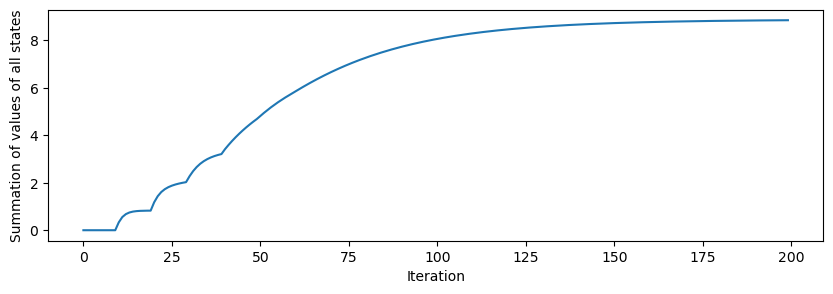

In [7]:
import matplotlib.pyplot as plt

# Plot the rewards over time
plt.figure(figsize=(10, 3), dpi=100)
plt.plot(V_total)
plt.xlabel("Iteration")
plt.ylabel("Summation of values of all states")
plt.show()

The optimal policy: 

In [8]:
actions = np.array(['<', 'V', '>', 'A']) # left, down, right, up
optimal_policy = actions[policy]

print(optimal_policy.reshape((4, 4)))

[['<' 'A' 'A' 'A']
 ['<' '<' '<' '<']
 ['A' 'V' '<' '<']
 ['<' '>' 'V' '<']]
